In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [4]:
wine=load_wine()

In [5]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
X=pd.DataFrame(wine['data'],columns=wine['feature_names'])
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
X.shape

(178, 13)

In [8]:
y=wine['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [10]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0


In [11]:
y_test

array([2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0])

In [12]:
model=LogisticRegression()

In [13]:
model.fit(X_train,y_train)

C:\Users\arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.score(X_test,y_test)

0.9722222222222222

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred

array([2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0])

In [17]:
y_test

array([2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0])

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score,recall_score

In [19]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       0.92      1.00      0.96        12\n           2       1.00      0.89      0.94         9\n\n    accuracy                           0.97        36\n   macro avg       0.97      0.96      0.97        36\nweighted avg       0.97      0.97      0.97        36\n'

In [20]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  8]], dtype=int64)

<Axes: >

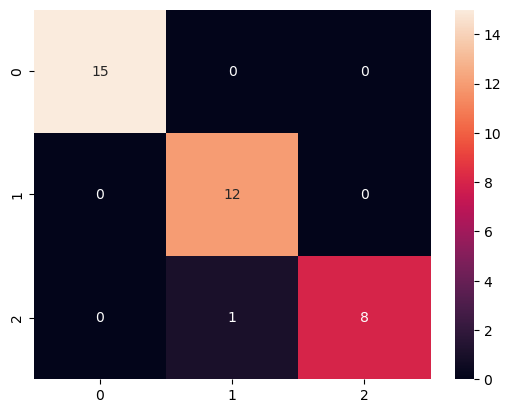

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [22]:
model.predict_proba(X_test)

array([[7.43529357e-05, 7.46913414e-06, 9.99918178e-01],
       [8.30644975e-01, 1.32126949e-01, 3.72280768e-02],
       [9.90134928e-03, 9.89772333e-01, 3.26317485e-04],
       [2.03159720e-04, 9.99597898e-01, 1.98942467e-04],
       [1.79865260e-03, 9.97576442e-01, 6.24905094e-04],
       [1.32533841e-03, 9.98636491e-01, 3.81705782e-05],
       [9.91240979e-01, 1.78373852e-04, 8.58064693e-03],
       [9.99723602e-01, 1.01203330e-05, 2.66277590e-04],
       [2.80066321e-01, 7.19713094e-01, 2.20585345e-04],
       [6.44070218e-02, 9.04172844e-01, 3.14201341e-02],
       [2.58938718e-03, 9.96912378e-01, 4.98234912e-04],
       [9.99588472e-01, 2.52480698e-07, 4.11275338e-04],
       [9.98853787e-01, 5.37585055e-04, 6.08627974e-04],
       [2.72264335e-04, 7.65173127e-08, 9.99727659e-01],
       [4.56993712e-04, 9.98940368e-01, 6.02638195e-04],
       [1.92763977e-04, 2.00526883e-06, 9.99805231e-01],
       [9.82633240e-01, 2.58380378e-03, 1.47829564e-02],
       [3.49128124e-03, 9.86704

In [23]:



import warnings
warnings.filterwarnings('ignore')
data = {'Random': [], 'Accuracy': []}

def given_random(random_no):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_no)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    data['Random'].append(i)
    data['Accuracy'].append(score)

for i in range(1000):
    given_random(i)
#    score = given_random(i)
#    data['Random'].append(i)
#    data['Accuracy'].

In [24]:
pg=pd.DataFrame(data)

In [25]:
pg

,Random,Accuracy
0,0,0.916667
1,1,0.944444
2,2,0.888889
3,3,0.888889
4,4,0.944444
...,...,...
995,995,0.888889
996,996,1.000000
997,997,0.888889
998,998,0.916667


In [26]:
pg['Accuracy'].max()

1.0

In [27]:
pg[pg['Accuracy']==1.0]

,Random,Accuracy
9,9,1.0
20,20,1.0
21,21,1.0
23,23,1.0
38,38,1.0
...,...,...
972,972,1.0
981,981,1.0
983,983,1.0
996,996,1.0


In [28]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [30]:
X['Target']=pd.DataFrame(y)

In [31]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [32]:
temp=X.sample()
temp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
27,13.3,1.72,2.14,17.0,94.0,2.4,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,0


In [33]:
print('Actual Value',X['Target'][0])

Actual Value 0


In [34]:
d=X['Target'].values[0]

In [35]:
dj=wine['target_names']

In [36]:
dj[0]

'class_0'

In [37]:
dj[1]

'class_1'

In [38]:
dj[2]

'class_2'

In [39]:
# proper Model of Wine 

temp=X.sample()
temp
print('Actual Value',dj[temp['Target'].values[0]])

my_pred=model.predict(temp.iloc[:,:-1])[0]

print('Prediction Value',dj[my_pred])


Actual Value class_1
Prediction Value class_1


In [40]:
temp['Target'].values[0]

1

In [41]:
my_pred=model.predict(temp.iloc[:,:-1])[0]

In [42]:
my_pred

1

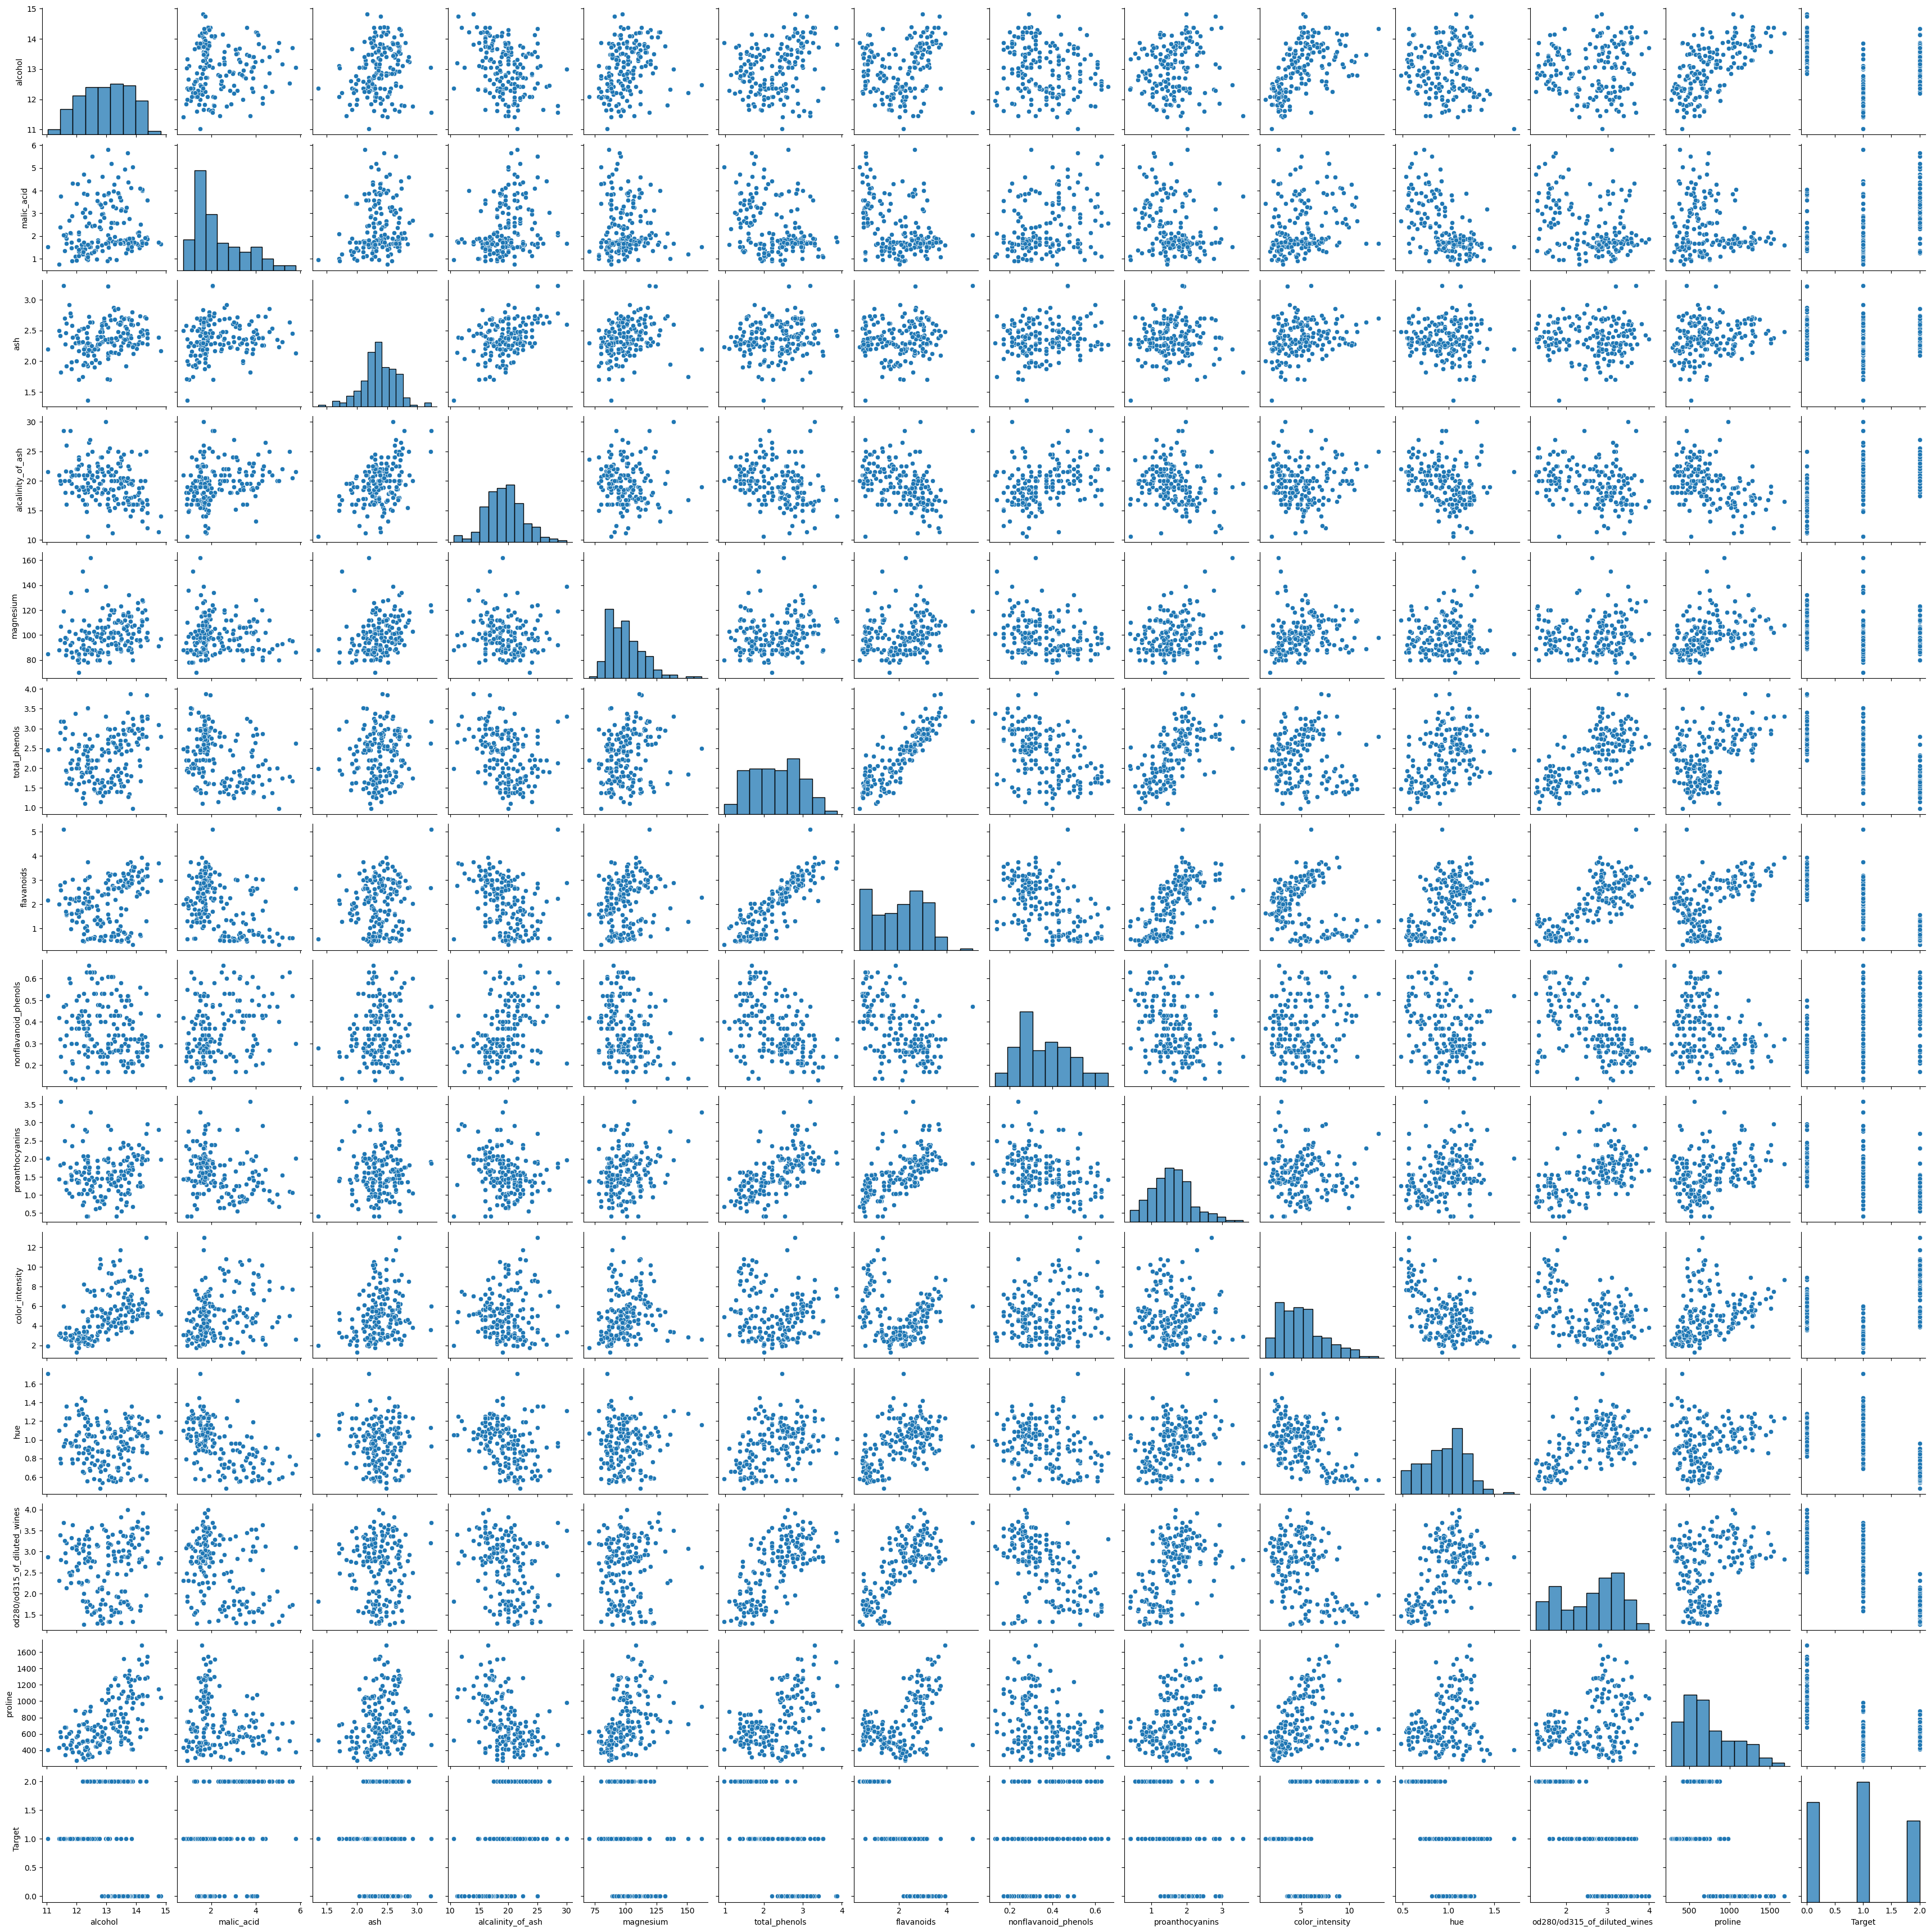

In [110]:
sns.pairplot(X)

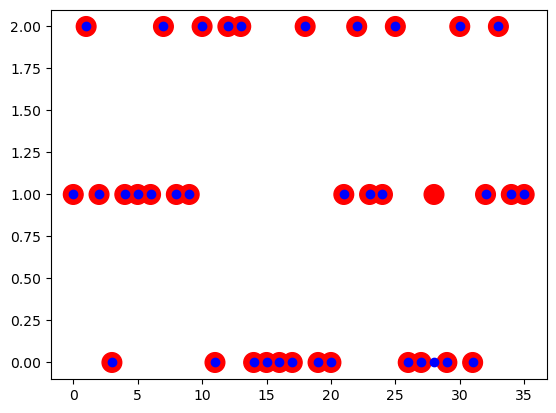

In [120]:
plt.scatter(range(len(y_test)),y_test,color='r',s=[200]*len(y_test))
plt.scatter(range(len(y_test)),y_pred,color='b')

In [ ]:
confusion

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  8]], dtype=int64)

In [45]:
Accuracy =15+12+8/15+12+18+1

In [46]:
Accuracy

58.53333333333333

In [48]:
a=np.array([[1,0],[1,0]])

In [49]:
a

array([[1, 0],
       [1, 0]])

In [55]:
TP=a[0,0]
TN=a[1,1]
FN=a[0,1]
FP=a[1,0]

In [58]:
Accuracy=(TN+TP)/(TN+TP+FN+FP)

In [59]:
Accuracy

0.5

In [62]:
precision=TP/(TP+FP)

In [63]:
precision

0.5

In [66]:
recall=TP/(TP+FN)

In [67]:
recall

1.0

In [72]:
F1=2*(precision*recall/(precision+recall))

In [73]:
F1

0.6666666666666666